In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)

In [ ]:
df['target']=diabetes.target

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

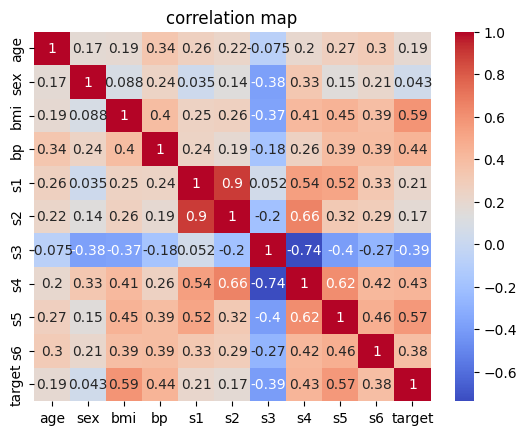

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("correlation map")
plt.show()

In [ ]:
x = df[['bmi','bp','s5','s4','sex']]
y = df['target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
r2 = r2_score(y_test,y_pred)



In [ ]:
print("mean squared error",mse)
print("r2 score",r2)

mean squared error 2823.6978031973035
r2 score 0.46704097254520993


In [ ]:
print(y_pred)

[169.48643104 172.79466017 171.38606526 280.82561058 133.84064154
 126.59242425 270.76233667 214.34478469  79.65053962 132.97793795
 116.94861961 134.2500326   62.11174425 197.46441993  95.20317681
 119.39566619 225.16192571 243.50171208 162.38688666 216.14309459
 199.79130515 104.67791868  83.42187859 189.13107069 162.00031588
 151.4399489  186.76558072 154.72534421  60.07812431 121.6195212
 181.65302403  99.27886914 135.16841686 166.68741615 176.08404519
 223.91449257 118.10720702 124.80778155 141.41902563  73.70628898
  80.37658276 119.49979143 139.83579754 134.02321378 178.29859298
  93.69620998  75.75897463 107.96334652  56.68528346 163.20288218
 146.4342998   69.12748699 114.71541937 110.19750926 191.33888801
 165.8169677  106.41202043 195.44761246 125.08964592  80.28047122
 201.33228576 190.08521778 144.80524202 117.29285666 115.29584325
 214.74021744 179.0195695  157.40248946 109.8327591  136.1956865
 168.60968226 201.13627143 219.46381106 130.55310135  79.43816088
 153.0143939

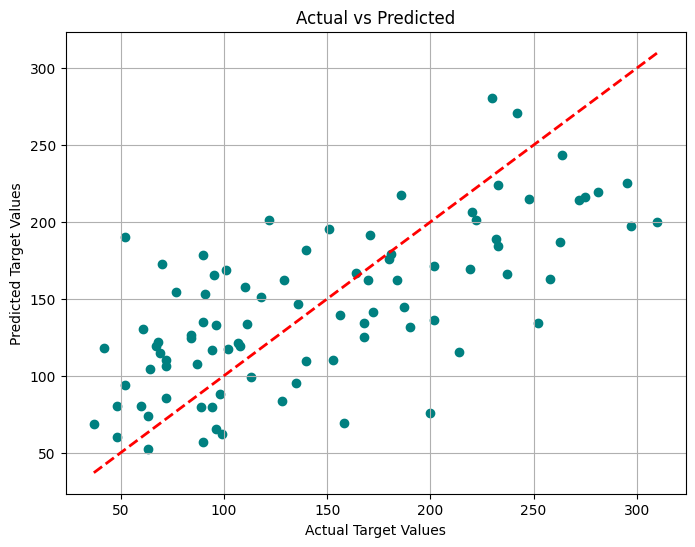

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_model = DecisionTreeRegressor()

In [ ]:
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
tree_pred = tree_model.predict(x_test)

In [ ]:
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

print("Decision Tree MSE:", tree_mse)
print("Decision Tree R2:", tree_r2)

Decision Tree MSE: 5831.528089887641
Decision Tree R2: -0.10067215260876128


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_model = RandomForestRegressor(n_estimators=100,random_state=42)

In [ ]:
forest_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
forest_pred = forest_model.predict(x_test)

In [ ]:
forest_mse = mean_squared_error(y_test,forest_pred)
forest_r2 = r2_score(y_test,forest_pred)

In [ ]:
print("forest mean sqaured error:",forest_mse)
print("forest r2 score:",forest_r2)

forest mean sqaured error: 2955.1095617977526
forest r2 score: 0.44223765153100103
